In [43]:
import pandas as pd
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt

import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_absolute_percentage_error



In [5]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Data/austin_311.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### ***Preprocessing***

In [6]:
df.head()

,Service Request (SR) Number,SR Description,Method Received,SR Status,SR Location,Street Number,Street Name,City,Zip Code,County,Latitude Coordinate,Longitude Coordinate,(Latitude.Longitude),Council District,Created Date,Closed Date
0,19-00090956,Animal - Proper Care,Phone,Closed,"4609 RIBBECKE AVE, AUSTIN, TX 78721",4609,RIBBECKE,AUSTIN,78721.0,TRAVIS,30.280581,-97.685318,"(30.28058076, -97.68531793)",1.0,2019-03-14 03:02:15,2020-11-23 01:41:21
1,20-00135805,Tree Issue ROW,Mobile Device,Closed,"3521 WEST AVE, AUSTIN, TX 78705",3521,WEST,AUSTIN,78705.0,TRAVIS,30.302857,-97.742312,"(30.30285681, -97.74231249)",9.0,2020-04-07 07:06:32,2020-11-23 12:02:05
2,20-00052942,Pothole Repair,Web,Closed,"7900 E BEN WHITE BLVD WB, AUSTIN, TX",7900,BEN WHITE BLVD WB,AUSTIN,78741.0,TRAVIS,30.219838,-97.688440,"(30.21983764, -97.68844011)",3.0,2020-02-12 01:55:04,2020-02-12 12:57:35
3,19-00467964,ARR Dead Animal Collection,Phone,Closed,"7100 METROPOLIS DR, AUSTIN, TX 78744",7100,METROPOLIS,AUSTIN,78744.0,TRAVIS,30.206036,-97.702592,"(30.20603574, -97.70259216)",2.0,2019-12-10 02:17:04,2019-12-11 09:57:54
4,19-00468033,Austin Code - Request Code Officer,Phone,Closed,"2401 GROVE BLVD, AUSTIN, TX 78741",2401,GROVE,AUSTIN,78741.0,TRAVIS,30.221664,-97.707177,"(30.22166434, -97.70717698)",3.0,2019-12-10 02:51:24,2019-12-10 03:00:05


In [7]:
df.tail()

,Service Request (SR) Number,SR Description,Method Received,SR Status,SR Location,Street Number,Street Name,City,Zip Code,County,Latitude Coordinate,Longitude Coordinate,(Latitude.Longitude),Council District,Created Date,Closed Date
912296,21-00061898,Community Connections - Coronavirus,Phone,Closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-11 10:27:26,2021-02-25 04:41:11
912297,21-00062129,Community Connections - Coronavirus,E-Mail,Closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-11 12:17:19,2021-02-26 10:17:19
912298,21-00062207,Community Connections - Coronavirus,Phone,Closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-11 12:56:59,2021-02-25 03:25:02
912299,21-00062502,Tree Issue ROW,Phone,Resolved,"6405 CLUBWAY LN, AUSTIN, TX 78745",6405.0,CLUBWAY,AUSTIN,78745.0,TRAVIS,30.204533,-97.797817,"(30.204533, -97.79781699)",2.0,2021-02-11 03:11:08,2021-02-12 11:42:07
912300,21-00062653,Community Connections - Coronavirus,Phone,Closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-11 04:18:40,2021-02-25 04:32:26


In [8]:
df.describe(include = 'all') # This will be analyzed further soon

# Some latitude and longitude coordinates are faulty, the one that appeared in top is situated in the Pacific Ocean.

,Service Request (SR) Number,SR Description,Method Received,SR Status,SR Location,Street Number,Street Name,City,Zip Code,County,Latitude Coordinate,Longitude Coordinate,(Latitude.Longitude),Council District,Created Date,Closed Date
count,912301,912301,912301,912301,903257,733981.0,903242,900191,899447.000000,894575,903257.000000,903257.000000,903257,858106.000000,912301,910341
unique,912301,143,18,13,323739,21000.0,38077,134,NaN,6,NaN,NaN,315647,NaN,904126,848206
top,19-00090956,Austin Code - Request Code Officer,Phone,Closed,"1520 RUTHERFORD LN, AUSTIN, TX 78754",1520.0,LAMAR,AUSTIN,NaN,TRAVIS,NaN,NaN,"(3.442386682, -105.9831947)",NaN,2015-02-18 12:00:00,2016-04-18 04:33:33
freq,1,157961,730687,858294,3097,2872.0,11968,862460,NaN,867774,NaN,NaN,2150,NaN,31,314
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78729.543079,NaN,30.226383,-97.763444,NaN,5.506708,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.508744,NaN,1.310668,0.406121,NaN,3.025361,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78610.000000,NaN,3.442387,-105.983195,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78705.000000,NaN,30.232492,-97.773683,NaN,3.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78739.000000,NaN,30.279274,-97.741555,NaN,5.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78749.000000,NaN,30.345623,-97.705675,NaN,9.000000,NaN,NaN


https://goo.gl/maps/eQb92sVLbE7MdJUw5
Image of average coordinates

The coordinates average out to the south central part of urban austin, thus the coordinates are reasonable.

In [9]:
df.dtypes # it seems that Zip Code and Council Districts are recorded as floats, which might lead one to think
# that they are continuous values, but in reality, at least for the Austin area (no leading zeros), integer values which are discrete


Service Request (SR) Number     object
SR Description                  object
Method Received                 object
SR Status                       object
SR Location                     object
Street Number                   object
Street Name                     object
City                            object
Zip Code                       float64
County                          object
Latitude Coordinate            float64
Longitude Coordinate           float64
(Latitude.Longitude)            object
Council District               float64
Created Date                    object
Closed Date                     object
dtype: object

In [10]:
# convert Council District and Zip Code to integers for workability.
df['Council District'] = df['Council District'].astype('Int64')
df['Zip Code'] = df['Zip Code'].astype('Int64')
df['Created Date'] = pd.to_datetime(df['Created Date']) # convert to datetime objects
df['Closed Date'] = pd.to_datetime(df['Closed Date']) # convert to datetime objects


In [11]:

# Create a copy of the dataFrame for pruning.
df2 = df

# Approach by dropping street number, as it is not informative on its own.
df2.drop(['Service Request (SR) Number','SR Location','Street Number'], axis = 1, inplace = True)

# The latitude.longitude column contains objects set up to look like a tuple.
# Considering that there already are  longitude and latitude columns separately,
# one can can drop latitude.longitude

df2.drop(['(Latitude.Longitude)'], axis = 1, inplace = True)


In [12]:
df2.nunique() # all service request (SR) Numbers are unique. Those aren't informative.
# SR Location is referring to the exact address. The cardinality is too high.





SR Description             143
Method Received             18
SR Status                   13
Street Name              38077
City                       134
Zip Code                    68
County                       6
Latitude Coordinate     307430
Longitude Coordinate    301250
Council District            10
Created Date            904126
Closed Date             848206
dtype: int64

In [13]:
df2.isnull().sum() # There exists null entries, one needs to find the best way to handle those.

SR Description              0
Method Received             0
SR Status                   0
Street Name              9059
City                    12110
Zip Code                12854
County                  17726
Latitude Coordinate      9044
Longitude Coordinate     9044
Council District        54195
Created Date                0
Closed Date              1960
dtype: int64

In [14]:
def drop_percent(df):
  dropped_row_count = len(df) - len(df.dropna(axis = 0, how = 'any'))
  return dropped_row_count/len(df2) *  100
 
print(drop_percent(df2))

# one would be dropping around 6.7% of the data. One can mitigate the loss of information by filling some of the row features with mean values.

# However, the issue is that some of these features are categorical, even if they are numerical in nature.

# Only the latitude and longitude coordinates are continuous. 

# Realistically, if multiple attempts to contact 311 were made from one location, one can think of the mean as the weighted average coordinates
# of 311 correspondences in the Austin metropolitan area, where the number of rows corresponding mapping to one coordinate is the weight

# because there are 307,430 latitude and 301,250 longitude coordinates, on average, one set of coordinates will have 3 correspondences to 311 associated.

lat_col = df2['Latitude Coordinate']
long_col = df2['Longitude Coordinate'] # we will keep these coordinates possibly for visualization

df2['Latitude Coordinate'] = lat_col.fillna(lat_col.mean(skipna=True))
df2['Longitude Coordinate'] = long_col.fillna(long_col.mean(skipna=True))

# we also need to remove rows where there is no info on location whatsoever.

len(df2) - len(df2.dropna(how='all')) # this equals 0, no fully null rows

# One can replace null categorical values with the mode of the categ                                                                                                                                                                        ories
# however, this reduces the granularity and specificity of the 311 calls.
# It may be best to simply remove 6.7% of the rows for workability.
# The original dataframe preserves all rows if another approach works better.

# However, removing rows with null entries can artificially reduce the cardinality of the data. Further looking at the data can be beneficial.


# The 1960 null closed dates don't necessarily mean that the case is still open.
# The model is much more workable and simplified if these are removed. These will barely affect
# the amount of data dropped
df2.dropna(subset=['Closed Date'], inplace= True)

# The street Name will not be used for classification. The reason is that
# the cardinality is too high. Some streets may have a higher population density,
#  length, and pass through different areas of town. However, looking at street
# names which map the highest count of 311 correspondences can be interesting.



# More analysis can be done to find what to do with the null entries.


6.728371447581445


***Continued analysis of unique categories***

In [15]:

for col in df2.columns:
    print(col," : ", df2[col].unique())
    print('\n')

SR Description  :  ['Animal - Proper Care' 'Tree Issue ROW' 'Pothole Repair'
 'ARR Dead Animal Collection' 'Austin Code - Request Code Officer'
 'Austin Code - Signs/Billboards' 'Animal Bite'
 'Animal Control - Assistance Request' 'Sign - Traffic Sign Emergency'
 'Loose Dog' 'Sidewalk Repair' 'Found Animal - Pick Up'
 'Traffic Signal - Maintenance' 'Obstruction in ROW'
 'Traffic Signal - Dig Tess Request' 'Lane/Road Closure Notification'
 'Debris in Street' 'Bicycle Issues'
 'Austin Code - Short Term Rental Complaint SR'
 'Flooding  Current (Non-Emergency)' 'Creek & Pond Vegetation Control'
 'Channels/Creeks/Drainage Easement' 'Flooding - Past' 'Traffic Calming'
 'Construction/Permitting- ROW' 'Traffic Signal - New/Change'
 'ARR Missed Recycling' 'Park Maintenance - Grounds' 'Concerns in the ROW'
 'Street Light Issue- Address' 'Loose Animal Not Dog'
 'Storm Drain Pipe Services' 'Shared Micromobility'
 'ARR Missed Yard Trimmings/Compost' 'Injured / Sick Animal' 'Sign - New'
 'Street Lig

The cities of Fort Worth, Dallas, & Houston are intuitively not affiliated to Austin. One can remove those cities. 

The city of Austin has countless combinations & mispellings, and random upper/lower case alterations. One can reduce the number of unique cities with several simple methods and techniques.



In [16]:
df2["City"] = df2["City"].str.lower()
austin_str_partition = []
for i in range(len('austin')):
  austin_str_partition.append('austin'[i:]) 
  austin_str_partition.append('austin'[:-i])
austin_str_partition.remove('')

# more variations
words_to_add = ['ausstin', 'austtin', 'austin 5 etj', 'ausitn', 'austni', 'austin.','austin, tx', 'atx', 'ausin', 'astin', 'austib','austibn','ausin','austinm','austun','austn','aua',
                'austin `',]
for i in words_to_add: austin_str_partition.append(i) 

words_to_remove = ['houston','dallas', 'fort worth', 'plano', 'other']
for word in words_to_remove:
  df2.drop(df2[df2['City'] == word].index, inplace = True)


village_words = []
village_remove =[]
# all entries with 'village' can replaced without the prefix as they are repeated.
for i in df2['City'].unique():
  if 'village' in str(i):
    village_words.append(i)
    village_remove.append(i.replace('village of ',''))
    df2['City'] = df2['City'].replace([i],i.replace('village of ',''))

df2['City'] = df2['City'].replace(austin_str_partition,'austin')
df2['City'] = df2['City'].replace('bee caves','bee cave')

# make an assumption that terms related to travis are referring to austin as a city itself.
df2['City'] = df2['City'].replace('travis','austin')
df2['City'] = df2['City'].replace('travis county','austin')
print((df2['City'].unique()))
print(len(df2['City'].unique()))


['austin' 'elgin' 'pflugerville' nan 'lakeway' 'lago vista' 'cedar park'
 'manor' 'bee cave' 'round rock' 'webberville' 'volente' 'point venture'
 'rollingwood' 'creedmoor' 'sunset valley' 'west lake hill' 'san leanna'
 'jonestown' 'dripping sprin' 'mustang ridge' 'spicewood' 'del valle'
 'the hills' 'leander' 'hutto' 'buda' 'briarcliff' 'georgetown'
 'west lake hills' 'garfield' 'manchaca' 'kyle' 'bastrop' 'hays'
 'lockhart' 'dripping springs' 'cedar creek' 'coupland' 'marble falls'
 'sealy' 'bear creek' 'morrow' 'dale' 'worcester' 'oak hill' 'paige']
47


In [17]:
df2['Zip Code'].sort_values().unique() # a quick check shows all zip codes fall within what is reasonably austin and its rural surroundings

<IntegerArray>
[78610, 78612, 78613, 78615, 78616, 78617, 78619, 78620, 78621, 78626, 78634,
 78640, 78641, 78642, 78645, 78652, 78653, 78654, 78660, 78663, 78664, 78665,
 78669, 78681, 78701, 78702, 78703, 78704, 78705, 78712, 78717, 78719, 78721,
 78722, 78723, 78724, 78725, 78726, 78727, 78728, 78729, 78730, 78731, 78732,
 78733, 78734, 78735, 78736, 78737, 78738, 78739, 78741, 78742, 78744, 78745,
 78746, 78747, 78748, 78749, 78750, 78751, 78752, 78753, 78754, 78756, 78757,
 78758, 78759,  <NA>]
Length: 69, dtype: Int64

In [18]:
# There are more council district than counties, more cities than council districts and more zip code than cities

# zip codes can provide good granularity for a categorical description of location.
# However, given that plenty of row values are null, and that overriding them with an assumption leaves a model prone to bias,
# it is best to offset the lack of one categorical feature by the presence of another measure.

# Considering the presence of 54,104 null council district values and the geographic broadness of this feature,
# it may be best to forego this category.



In [19]:
df2.isnull().sum()

SR Description              0
Method Received             0
SR Status                   0
Street Name              9008
City                    12059
Zip Code                12794
County                  17661
Latitude Coordinate         0
Longitude Coordinate        0
Council District        53953
Created Date                0
Closed Date                 0
dtype: int64

In [20]:
df2.drop_duplicates(inplace = True) # remove duplicates
# all cases are succesffully resolved if they are 'closed' or 'resolved
# One SR status says 'TO BE DELETED'. Rows with this status will be deleted.
set(df2['SR Status'].unique())
# Implement a binary system.
# Operate under the assumption that incomplete closed correspondences are
#  'successful', they will be marked as ones. This artifically increases the probability of achieving a target of 1.
df2.drop(df2[df2['SR Status'] == 'TO BE DELETED'].index, inplace = True)
binary_0_set = set(['Open', 'Duplicate (open)','Closed -Incomplete', 'Work In Progress',
                 'Incomplete','Closed -Incomplete Information','New'])

binary_1_set = set(df2['SR Status'].unique()) - binary_0_set


df2['SR Status'] = df2['SR Status'].replace(list(binary_0_set),0)
df2['SR Status'] = df2['SR Status'].replace(list(binary_1_set),1)





Classification model to predict if a call will be resolved.



*  The question asks about new 311 calls, but disregarding all types of other methods of correspondence can reduce the sample size. It can also be important to know the effect of communication method on the probability of a case being resolved.
*   Considering that the question asks about new calls, the model operates without taking into consideration time as an input variable. Therefore, there is an attempt to generalize based on other factors.



It is very difficult to assume probabilistic independence within the independent variables themselves. Zip code can easily define city, and vice versa to some extent. This makes working with Naive Bayes difficult to justify without further pruning. However, Naive Bayes works well with categorical data.

Logistic regression also works best with low multicollinearity.

In addition, some anomalous independent variables can be neglected by reducing the number of independent variables. Overfitting can be mitigated.

Therefore, it would be best to constraint geographic independent variables 
to a select few, primarily City, Zip Code, & Lat-Long coordinates.



In [21]:
df2['Zip Code'] = df2['Zip Code'].astype('object') # convert back to object for OHE

# The line above was the easiest way to debug an issue related to implementing
# OHE on numerical data.
df2_full = df2.dropna() # altered form of df2. This drops the remaining null categorical entries.

X = df2_full.loc[:,['SR Description', 'Method Received', 'City', 'Zip Code','Latitude Coordinate','Longitude Coordinate']]
y = df2_full.loc[:,['SR Status']]

 # we choose X to be a multidimensional input, y is a scalar output.

cols_obj = [col for col in X.columns if X[col].dtype in ['object']]


# even though Zip Code is numerical and expressed as an integer, it is categorical
# in nature.
X_hot = pd.get_dummies(X, cols_obj) 

X_hot





,Latitude Coordinate,Longitude Coordinate,SR Description_AFD - Wildfire Concern / Presentation,SR Description_ARR Brush and Bulk,SR Description_ARR Dead Animal Collection,SR Description_ARR Dumpster,SR Description_ARR Missed Recycling,SR Description_ARR Missed Yard Trimmings /Organics,SR Description_ARR Missed Yard Trimmings/Compost,SR Description_ARR Street Sweeping,...,Zip Code_78749,Zip Code_78750,Zip Code_78751,Zip Code_78752,Zip Code_78753,Zip Code_78754,Zip Code_78756,Zip Code_78757,Zip Code_78758,Zip Code_78759
0,30.280581,-97.685318,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30.302857,-97.742312,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30.219838,-97.688440,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30.206036,-97.702592,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30.221664,-97.707177,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912291,30.223226,-97.804059,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
912292,30.411252,-97.721854,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
912293,30.285426,-97.847279,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
912294,30.453887,-97.809794,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Split into test set and training set

In [22]:

X_train, X_test, y_train, y_test = train_test_split(X_hot,y,test_size=0.2, random_state=1) # 80 % train, 20% test.



Attempt logistic regression and retrieve AOC ROC score.
This provides a good understanding of the profile of true positives and false positives.

1.   It is important to keep in mind the categorical nature of the data
2.   The definition of resolved or closed has been very liberal and expanded in nature, so the notion of a true positive may not align with one's expectations.



In [23]:

mdlLgr = LogisticRegression()
mdlLgr.fit(X_train,y_train)
y_test_pred = mdlLgr.predict(X_test)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [24]:
set(y_test_pred)

{1}

In [25]:
confusion_matrix(y_test, y_test_pred) # none of the values predicted as 0.


array([[     0,    404],
       [     0, 169643]])

In [26]:
roc_auc_score(y_test, y_test_pred) # logistic regression yields the worst case scenario for auc score.
# Try some more models before altering more.
# All values are predicted as zeros.


0.5

In [27]:
## Build Naive Bayes Gaussian model


mdlNbg = GaussianNB()
mdlNbg.fit(X_train, y_train)
y_test_pred_Nbg = mdlNbg.predict(X_test)
roc_auc_score(y_test, y_test_pred_Nbg)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6457625442666641

In [28]:
## Build Naive Bayes Bernoulli model

from sklearn.naive_bayes import BernoulliNB # also obtains worst case scenario, makes sense because the categories of input are not binary

mdlNbb = BernoulliNB(binarize=True)
mdlNbb.fit(X_train, y_train)
y_test_pred = mdlNbb.predict(X_test)
roc_auc_score(y_test, y_test_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5

In [30]:
from sklearn.naive_bayes import ComplementNB # negative values passed in.
mdlCnb = ComplementNB()
mdlCnb.fit(X_train, y_train)
y_test_pred_Cnb = mdlCnb.predict(X_test)
roc_auc_score(y_test, y_test_pred_Cnb)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

In [31]:
print(set(y_test_pred_Nbg)) #Great! There are values predicted as a no
confusion_matrix(y_test, y_test_pred_Nbg)


{0, 1}


array([[   391,     13],
       [114729,  54914]])

In [ ]:
%%time 
# Try with SVC, took around 10 minuts
mdlSvc = SVC()
mdlSvc.fit(X_train,y_train)
y_test_pred_Svc = mdlSvc.predict(X_test)

Massive runtime can be attributed to kernel tricks in which the number of parameter increases with number of data points. It seems SVM can't work with too many data points.

In [ ]:
confusion_matrix(y_test, y_test_pred_Svc) # SVC returns no negatives


array([[     0,    404],
       [     0, 169643]])

In [ ]:
# Try K Nearest Neighbors far too time consuming, didn't work

from sklearn.neighbors import KNeighborsClassifier

for i in [5,10,15,20,25]: 
  mdlKnc = KNeighborsClassifier(n_neighbors=i)
  mdlKnc.fit(X_train,y_train)
  y_test_pred = mdlKnc.predict(X_test)
  print(i, '\t', roc_auc_score(y_test, y_test_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KeyboardInterrupt: ignored

In [34]:
# Out of many options, t seems the only feasible one in terms of run time and acceptable results 
# is a Gaussian Naive Bayes classifier.

# To further test it, cross-validation can be done with the scoring parameter set to roc_auc
print('roc_auc cross validation')
print(cross_val_score(mdlNbg,X_hot,y, cv = 5, scoring = 'roc_auc'))

print('\n')

print(cross_val_score(mdlNbg,X_hot,y, cv = 5, scoring = 'precision'))






roc_auc cross validation


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[0.70597866 0.88932566 0.8813011  0.86736558 0.84238423]




/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[0.99965156 0.9996569  0.99962301 0.99981398 0.99967339]


The roc_auc cross validation scores seem to show that a gaussian NB seems to work with the data, with the lowest roc_auc at 0.706 and the highest at 0.889.
The values are well above the worst case of 0.5

These results are also supplemented by the high precision scores at 0.999 roughly for all of them.

Therefore, one can moderately predict if a new 311 correspondence will be resolved or not if assumptions about feature independence hold true, does not account for time, and looks into all service request methods.


***Regression for Mean Time To Resolution***

In [35]:
df2_target_1 = df2_full.drop(df2_full[df2_full['SR Status'] == 0].index) # remove cases not resolved nor closed
delta_t = df2_target_1['Closed Date'] - df2_target_1['Created Date'] # time to resolve
df2_target_1['delta_t days'] = delta_t.dt.days # add delta_t column
df2_target_1 = df2_target_1.drop(df2_target_1[df2_target_1['delta_t days'] < 0].index) # remove negative time cases



df2_target_1.describe(include = 'all')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,SR Description,Method Received,SR Status,Street Name,City,Zip Code,County,Latitude Coordinate,Longitude Coordinate,Council District,Created Date,Closed Date,delta_t days
count,803193,803193,803193.0,803193,803193,803193.0,803193,803193.000000,803193.000000,803193.000000,803193,803193,803193.000000
unique,140,17,NaN,30328,19,52.0,3,NaN,NaN,NaN,796632,750899,NaN
top,Austin Code - Request Code Officer,Phone,NaN,LAMAR,austin,78704.0,TRAVIS,NaN,NaN,NaN,2015-02-18 12:00:00,2016-04-18 04:33:33,NaN
freq,152471,641827,NaN,10997,800180,59283.0,779540,NaN,NaN,NaN,27,293,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 01:04:02,2015-01-01 01:04:02,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-28 12:59:44,2021-03-02 12:06:32,NaN
mean,NaN,NaN,1.0,NaN,NaN,NaN,NaN,30.280938,-97.747110,5.509612,NaN,NaN,34.362720
std,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.465397,0.150844,3.025994,NaN,NaN,111.295925
min,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.442387,-105.983195,1.000000,NaN,NaN,0.000000
25%,NaN,NaN,1.0,NaN,NaN,NaN,NaN,30.232898,-97.772058,3.000000,NaN,NaN,0.000000


In [36]:
X_reg = df2_target_1.loc[:,['SR Description', 'Method Received', 'City', 'Zip Code','Latitude Coordinate','Longitude Coordinate']]
y_reg = df2_target_1.loc[:,['delta_t days']]

cols_obj = [col for col in X_reg.columns if X_reg[col].dtype in ['object']]


# even though Zip Code is numerical and expressed as an integer, it is categorical
# in nature.
X_hot_reg = pd.get_dummies(X_reg, cols_obj) 






In [37]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_hot_reg,y_reg,test_size=0.2, random_state=1) # 80 % train, 20% test. 


Cannot Assume a linear relationship, try a decision tree, then random forest or gradient boosted trees.


In [38]:
from sklearn.tree import DecisionTreeRegressor


def getdecision_tree(X_trn, X_tst, y_trn, y_tst, mx_lf_nds):
  model_tree = DecisionTreeRegressor(max_leaf_nodes=mx_lf_nds,random_state=1)
  model_tree.fit(X_trn, y_trn)
  y_tst_prd = model_tree.predict(X_tst)
  mae_percent = mean_absolute_percentage_error(y_tst, y_tst_prd)
  return y_tst_prd, mae_percent # return as a tuple

In [39]:
output_tree = getdecision_tree(X_train2,X_test2,y_train2,y_test2, 10)
print('prediction: ', output_tree[0].mean(), '', end = ' ')
print('mae_percent: ', output_tree[1].mean())

prediction:  34.43161468121506  mae_percent:  4.565496599882282e+16


In [40]:
from sklearn.ensemble import RandomForestRegressor

def get_random_forest(X_trn,X_tst, y_trn,y_tst, mx_lf_nds):
  model_forest= RandomForestRegressor(max_leaf_nodes = mx_lf_nds, random_state=1)
  model_forest.fit(X_trn,y_trn)
  y_tst_prd = model_forest.predict(X_tst)
  mae_percent = mean_absolute_percentage_error(y_tst,y_tst_prd)
  return y_tst_prd, mae_percent 

In [41]:
output_forest = getdecision_tree(X_train2,X_test2,y_train2,y_test2, 10)
print('prediction: ', output_tree[0].mean(), '', end = ' ')
print('mae_percent: ', output_tree[1])


prediction:  34.43161468121506  mae_percent:  4.565496599882282e+16


In [ ]:
# It is quite difficult explaining the source of the high mean absolute error, howvever for both cases, the mean of the prediction is similat
# to the dataframe's mean in days. The percentage error is far too high to be a realistic value.

In [ ]:
from xgboost import XGBRegressor # Gradient boosted trees, too computationally intense.

mdlXgb = XGBRegressor()
mdlXgb.fit(X_train2, y_train2)
y_test_pred = mdlXgb.predict(X_test2)
mae = mean_absolute_percentage_error(y_train2, y_test2)

print('MAE % for Gradient Boosted Trees: ', mae)

In [ ]:
# For now, use the output from the decision tree for cross validation
model_forest= RandomForestRegressor(max_leaf_nodes = 10, random_state=1)
print('MAE cross-val')
print('\n')
print(cross_val_score(model_forest,X_hot_reg,y_reg, cv = 5, scoring = 'neg_mean_absolute_error'))
print('\n')


print(cross_val_score(model_forest,X_hot_reg,y_reg, cv = 5, scoring = 'r2'))




Part 3- Additional insights

It would be interesting looking at the top 30 cities names have the most 311 correspondences. The same can be said for street names.

Looking at the most common type of complaint can also be informative.

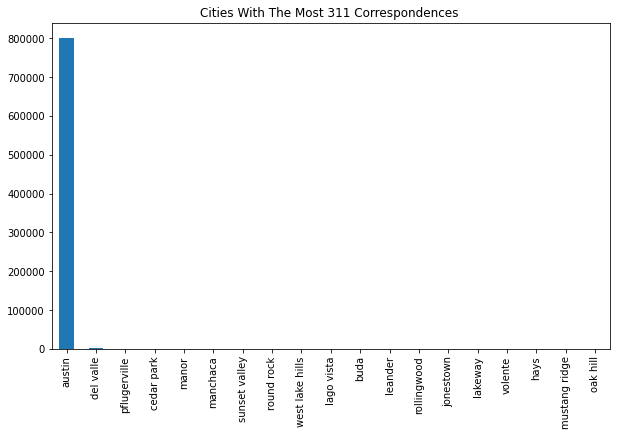

In [47]:
# Use df2_target_1
(df2_target_1['City'].value_counts()).head(30).plot(kind='bar',
                    figsize=(10,6), title = 'Cities With The Most 311 Correspondences ')

# Austin is overwhelmingly the majority of calls. Del Valle is noticeable 
# but the other cities. Considering the population density and levels of activity,
# this makes sense




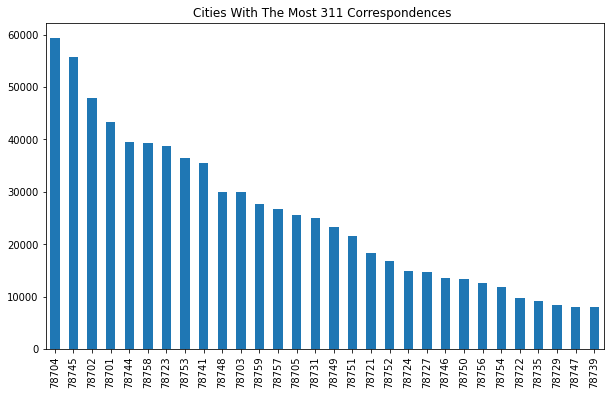

In [50]:
# One can attempt to look at the zipcodes for a more info

(df2_target_1['Zip Code'].value_counts()).head(30).plot(kind='bar',
                    figsize=(10,6), title = 'Cities With The Most 311 Correspondences ')

# 78704 is a highly populated area, and this zip code aligns  with the geographic
# mean coordinates.


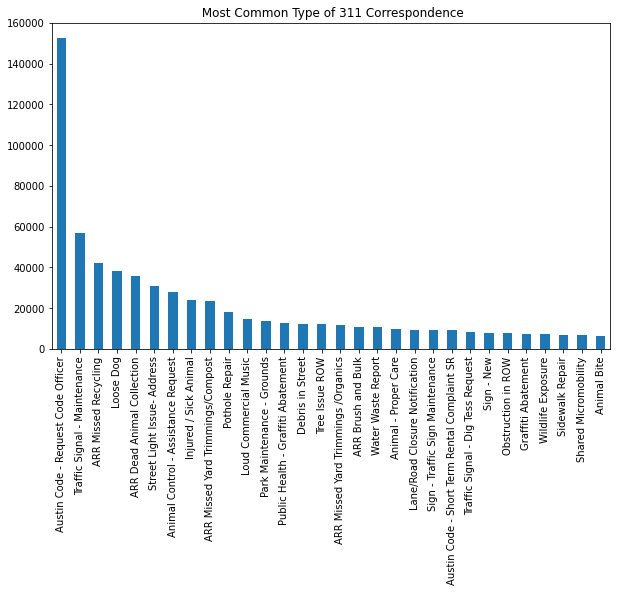

In [53]:
# What are the most common types of 311 correspondences (top 30)

(df2_target_1['SR Description'].value_counts()).head(30).plot(kind='bar',
                    figsize=(10,6), title = ' Most Common Type of 311 Correspondence')

# Requesting an officer for assistance makes sense as the most common type because 
# of how general the request is. Officers are often requested to work with countless
# scenarios.



One can look at how income or the ethnic makeup of a zip code can affect response time, as this is a topic of interest to many. Austin can make an interesting case study.